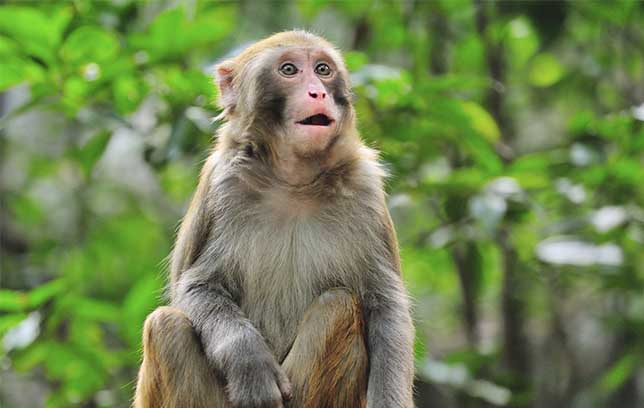

In [9]:
# This is the image needed to be recognized using Deep Learning(Keras-VGG16)
# From my view, it should be a monkey :-)
from IPython.display import Image
Image(filename='monkey.jpg')

In [8]:
# Here is part to bulid the image recoginition using Keras-VGG16 

import os
os.environ['KERAS_BACKEND']='theano'

# import the necessary packages
from keras.preprocessing import image as image_utils
from imagenet_utils import decode_predictions
from imagenet_utils import preprocess_input
from vgg16 import VGG16
import numpy as np
import argparse
import cv2

# load the original image via OpenCV so we can draw on it and display
# it to our screen later
orig = cv2.imread('monkey.jpg')

# load the input image using the Keras helper utility while ensuring
# that the image is resized to 224x224 pxiels, the required input
# dimensions for the network -- then convert the PIL image to a
# NumPy array
print("[INFO] loading and preprocessing image...")
image = image_utils.load_img('monkey.jpg', target_size=(224, 224))
image = image_utils.img_to_array(image)

# our image is now represented by a NumPy array of shape (3, 224, 224),
# but we need to expand the dimensions to be (100, 3, 224, 224) so we can
# pass it through the network -- we'll also preprocess the image by
# subtracting the mean RGB pixel intensity from the ImageNet dataset
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# load the VGG16 network
print("[INFO] loading network...")
model = VGG16(weights="imagenet")

# classify the image
print("[INFO] classifying image...")
preds = model.predict(image)
(inID, label, probability) = decode_predictions(preds)[0][0]

# display the predictions to our screen
print("ImageNet ID: {}, Label: {}".format(inID, label))
cv2.putText(orig, "Label: {}".format(label), (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
cv2.imshow("Classification", orig)
cv2.waitKey(0)

[INFO] loading and preprocessing image...
[INFO] loading network...
K.image_dim_ordering: tf
[INFO] classifying image...
ImageNet ID: n02487347, Label: macaque


99

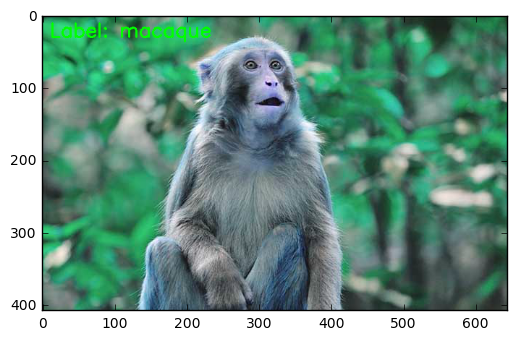

In [11]:
# From the image recoginition using Keras-VGG16, it even gave a finer classification as "Macaque"!!!!!!!!

%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(orig)
plt.show()